In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from glob import glob

from package.helpers import test_physical_lens
from package.plots import diagnostic_plot, plot

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [3]:
array_dir_grid = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'grid_oversampling')
array_dir_samples = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'num_samples')

figure_dir_grid = os.path.join(repo_path, 'figures', 'diagnostics', 'grid_oversampling')
figure_dir_samples = os.path.join(repo_path, 'figures', 'diagnostics', 'num_samples')

grid_list = glob(array_dir_grid + '/grid_oversampling_*.npy')
samples_list = glob(array_dir_samples + '/num_samples_*.npy')

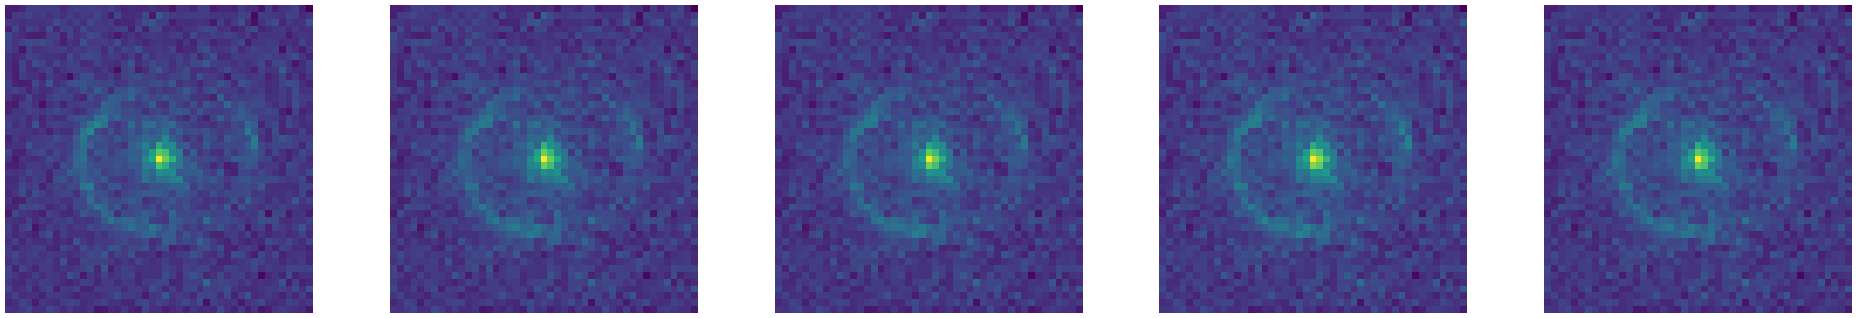

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=len(grid_list), figsize=(24, 4))

title_list = [os.path.basename(i) for i in grid_list]

for i, file in enumerate(grid_list):
    array = np.load(file)
    axis = ax[i].imshow(array)
    # ax[i].set_title(title_list[i])
    ax[i].set_axis_off()

# fig.colorbar(axis, ax=ax, ticks=[-0.1, -0.01, -0.001, 0, 0.001, 0.01, 0.1])

plt.savefig(os.path.join(figure_dir_grid, 'grid_oversampling.png'))
plt.show()

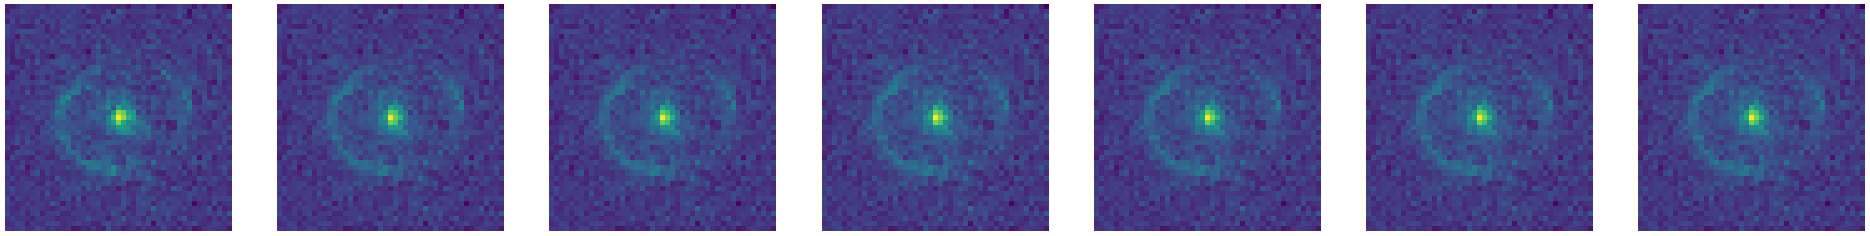

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=len(samples_list), figsize=(24, 4))

title_list = [os.path.basename(i) for i in samples_list]

for i, file in enumerate(samples_list):
    array = np.load(file)
    axis = ax[i].imshow(array)
    # ax[i].set_title(title_list[i])
    ax[i].set_axis_off()

# fig.colorbar(axis, ax=ax, ticks=[-0.1, -0.01, -0.001, 0, 0.001, 0.01, 0.1])

plt.savefig(os.path.join(figure_dir_samples, 'num_samples.png'))
plt.show()

In [10]:
execution_times_grid = np.load(os.path.join(array_dir_grid, 'execution_times_grid_oversampling.npy'))
print(execution_times_grid)

['0:01:31' '0:05:35' '0:08:25' '0:09:55' '0:11:00']


In [9]:
point_source_count_grid = np.load(os.path.join(array_dir_grid, 'point_source_count_grid_oversampling.npy'))
print(point_source_count_grid)

[1153 4314 6447 7650 8459]


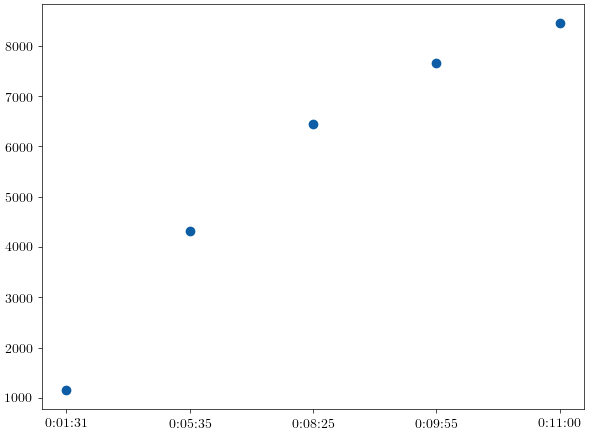

In [13]:
plt.scatter(execution_times_grid, point_source_count_grid)

In [12]:
execution_times_samples = np.load(os.path.join(array_dir_samples, 'execution_times_num_samples.npy'))
print(execution_times_samples)

['0:01:02' '0:04:13' '0:07:11' '0:17:17' '0:23:00' '0:38:49' '0:46:01']


In [11]:
point_source_count_samples = np.load(os.path.join(array_dir_samples, 'point_source_count_num_samples.npy'))
print(point_source_count_samples)

[  936  3855  6447 15998 20958 35355 42114]


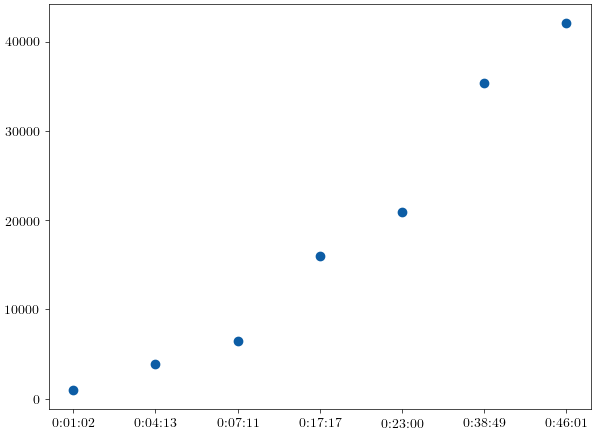

In [14]:
plt.scatter(execution_times_samples, point_source_count_samples)